In [49]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
warnings.filterwarnings('ignore')
# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

1. Order Trends Over Time

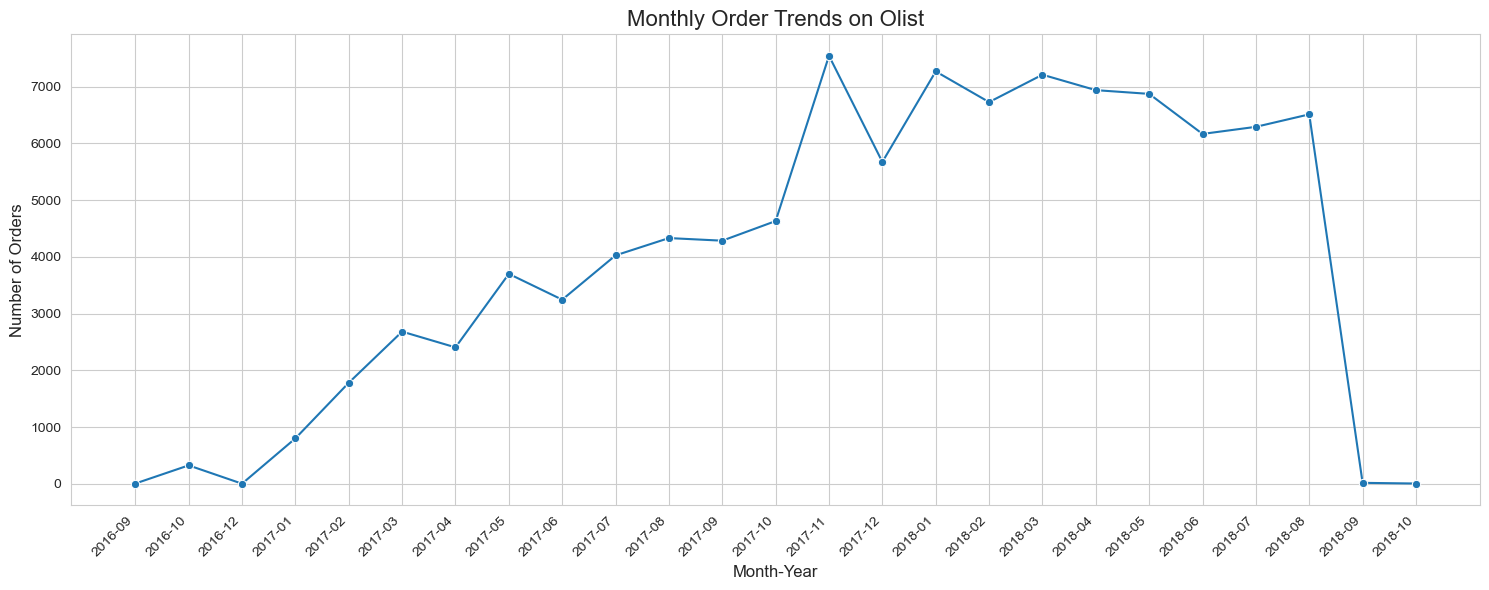

In [50]:
# Load orders dataset
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp'])

# Extract year-month for time series analysis
orders['purchase_year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Plot monthly order trends
monthly_orders = orders.groupby('purchase_year_month').size().reset_index(name='count')
monthly_orders['purchase_year_month'] = monthly_orders['purchase_year_month'].astype(str)

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_orders, x='purchase_year_month', y='count', marker='o')
plt.title('Monthly Order Trends on Olist', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Findings: Insights from the Plot:

- There is a clear upward trend in the number of orders from late 2016 through mid-2018, indicating strong growth in platform usage.
- The number of orders peaks around late 2017 and early 2018, with some seasonality and fluctuations visible.
- After the peak, there is a sharp drop in orders, likely due to incomplete data for the last months in the dataset.
- The visualization helps identify periods of high demand and potential seasonality in customer purchasing behavior.

#### 2. Customer Geographic Distribution

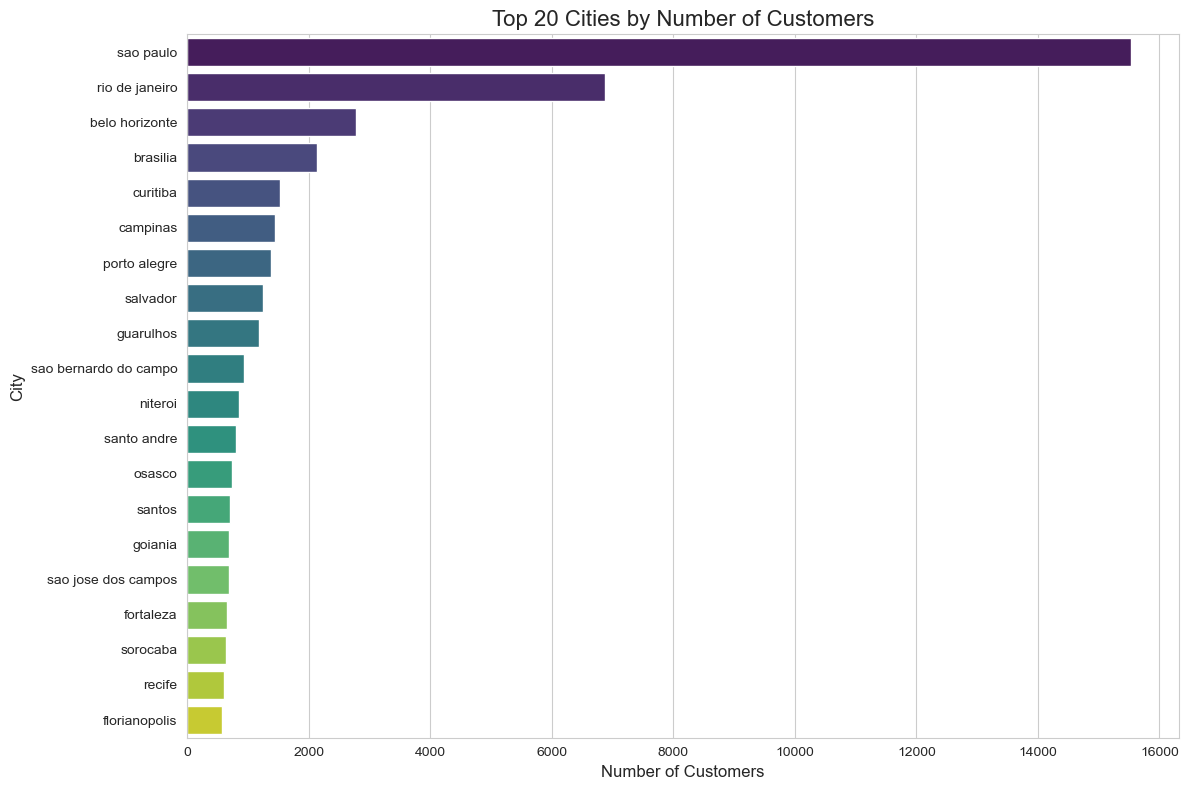

In [52]:
# Load customers and geolocation data
customers = pd.read_csv('olist_customers_dataset.csv.zip')
#geolocation = pd.read_csv('olist_geolocation_dataset.csv')

# Get unique customer cities with their coordinates
customer_cities = customers['customer_city'].value_counts().head(20).reset_index()
customer_cities.columns = ['city', 'count']

plt.figure(figsize=(12, 8))
sns.barplot(data=customer_cities, y='city', x='count', palette='viridis')
plt.title('Top 20 Cities by Number of Customers', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

#### 3. Payment Method Analysis

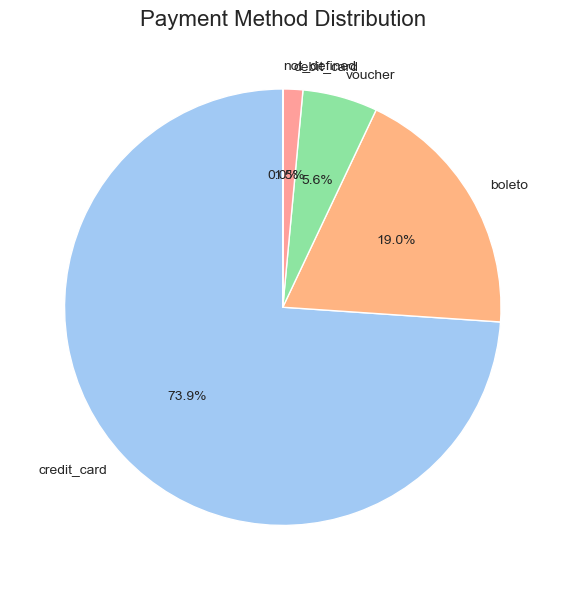

In [53]:
# Load payments data
payments = pd.read_csv('olist_order_payments_dataset.csv')

# Payment method distribution
payment_methods = payments['payment_type'].value_counts().reset_index()
payment_methods.columns = ['method', 'count']

plt.figure(figsize=(10, 6))
plt.pie(payment_methods['count'], labels=payment_methods['method'], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Payment Method Distribution', fontsize=16)
plt.tight_layout()
plt.show()

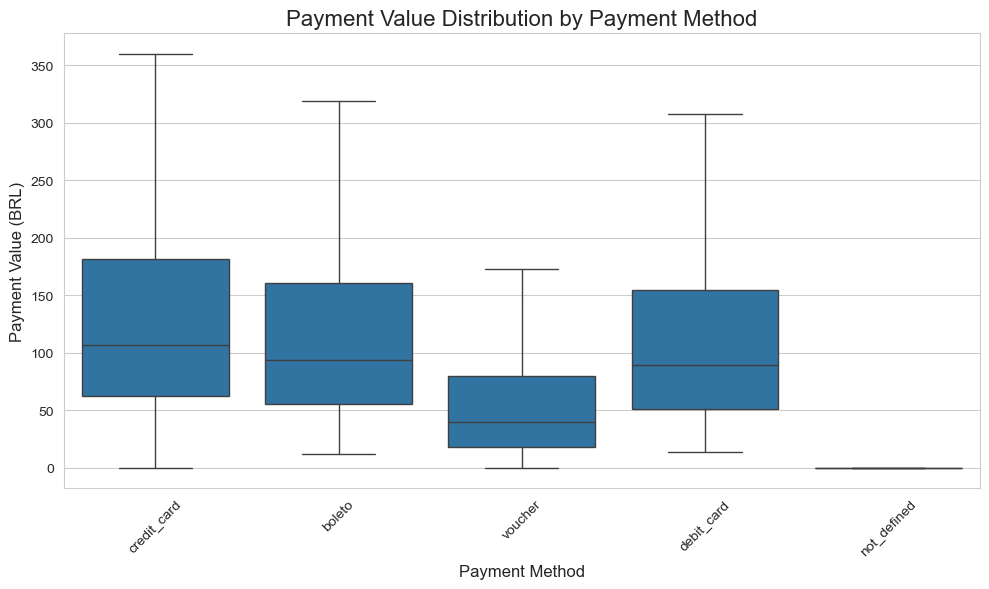

In [54]:
# Payment value by method
plt.figure(figsize=(10, 6))
sns.boxplot(data=payments, x='payment_type', y='payment_value', showfliers=False)
plt.title('Payment Value Distribution by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Payment Value (BRL)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Findings: Payment Value by Payment Method

- **Credit card** payments show a wide range of transaction values, with a higher median compared to other methods, indi
cating frequent use for both small and large purchases.
- **Boleto** (bank slip) and **voucher** payments tend to have lower median values, suggesting they are more commonly used for smaller transactions.
- **Debit card** payments are less frequent and generally have lower payment values.
- The presence of outliers (not shown in the plot) suggests occasional high-value transactions across all methods, but the majority of payments cluster at lower values.
- These insights highlight customer preferences and can inform payment partnership or promotional strategies.

#### 4. Product Category Analysis

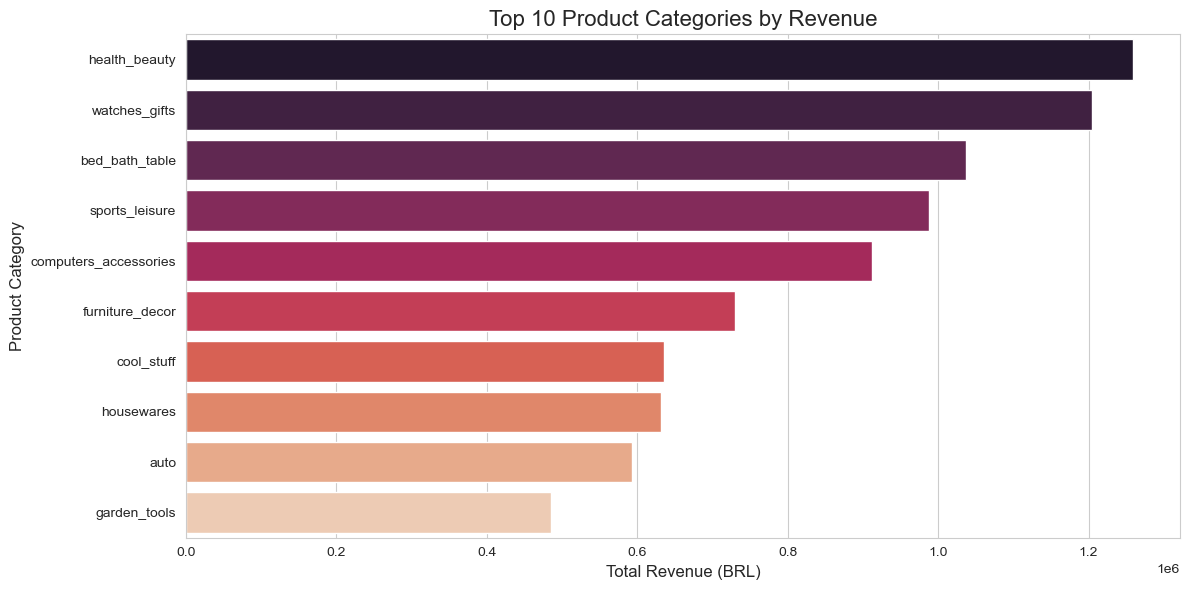

In [56]:
# Load order items and products data
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')

# Merge datasets
products = pd.merge(products, category_translation, on='product_category_name', how='left')
order_details = pd.merge(order_items, products, on='product_id', how='left')

# Top product categories by revenue
top_categories = order_details.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories, y='product_category_name_english', x='price', palette='rocket')
plt.title('Top 10 Product Categories by Revenue', fontsize=16)
plt.xlabel('Total Revenue (BRL)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()

#### 5. Customer Review Analysis


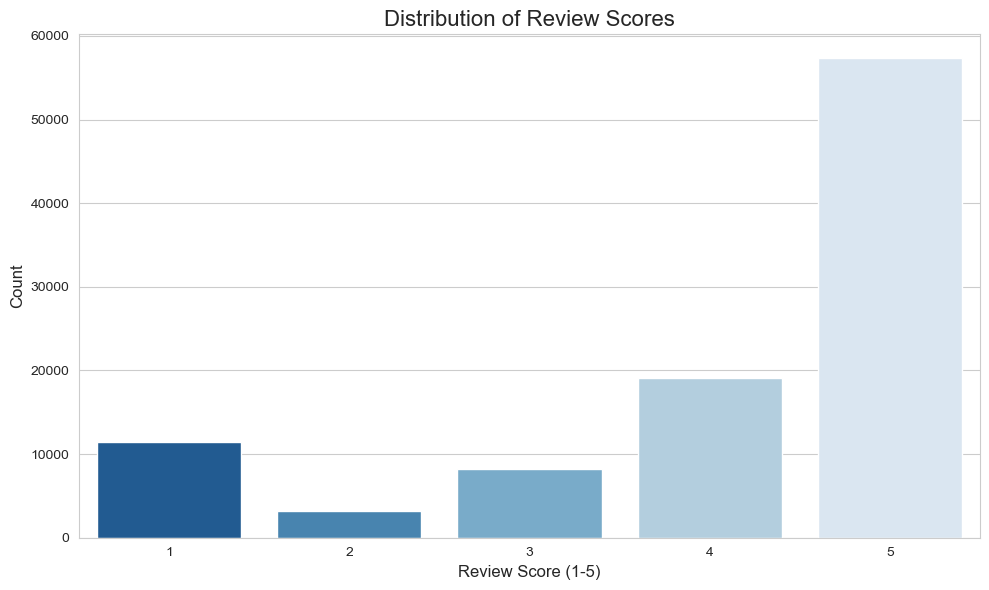

In [57]:
# Load reviews data
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

# Review score distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=reviews, x='review_score', palette='Blues_r', order=sorted(reviews['review_score'].unique()))
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Review Score (1-5)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

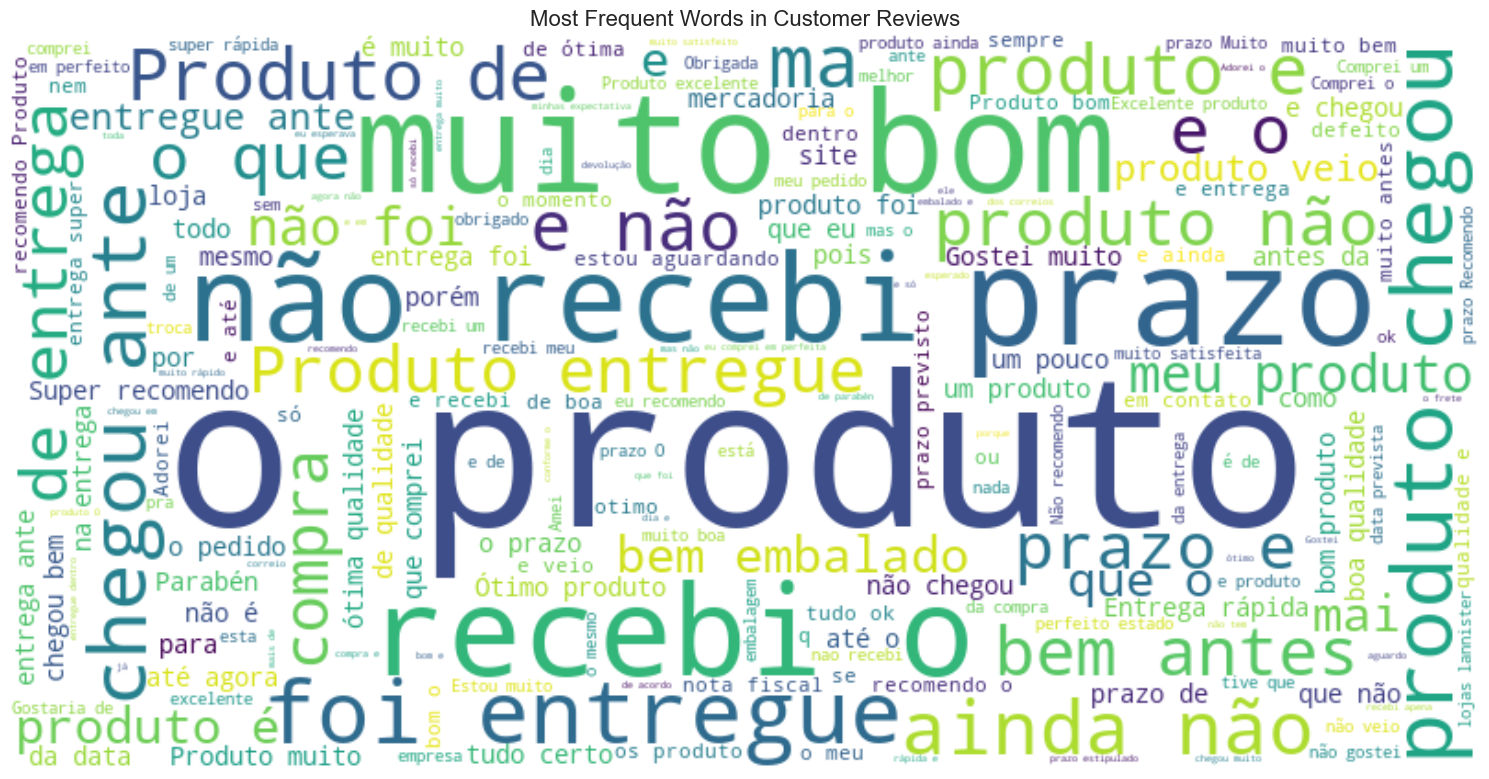

In [58]:
# Word cloud of review comments (requires wordcloud package)
from wordcloud import WordCloud

# Combine all review comments
text = " ".join(review for review in reviews['review_comment_message'].astype(str) if review != 'nan')

wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Customer Reviews', fontsize=16)
plt.tight_layout()
plt.show()

### Delivery Time Analysis 

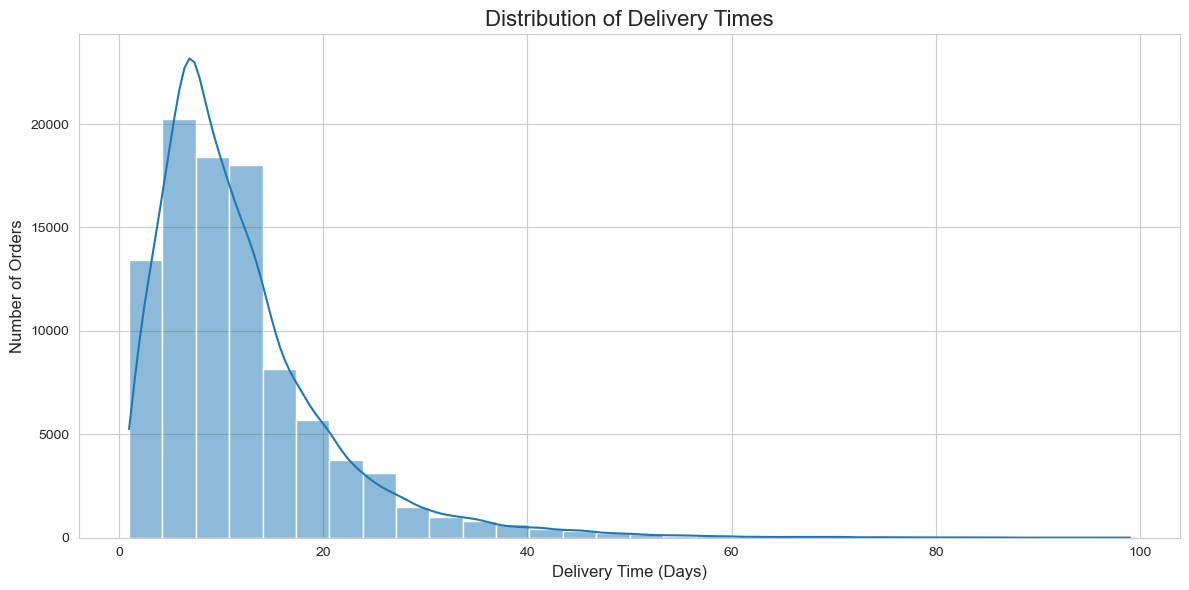

In [59]:
# Calculate delivery time in days
#Calculate delivery time in days and visualize delivery performance:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

#Filter out unrealistic values (e.g., negative or extremely high delivery times) without overwriting the original DataFrame

filtered_orders = orders[(orders['delivery_time'] > 0) & (orders['delivery_time'] < 100)]

plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_orders, x='delivery_time', bins=30, kde=True)
plt.title('Distribution of Delivery Times', fontsize=16)
plt.xlabel('Delivery Time (Days)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.tight_layout()
plt.show()

#### 6. Delivery Performance Analysis

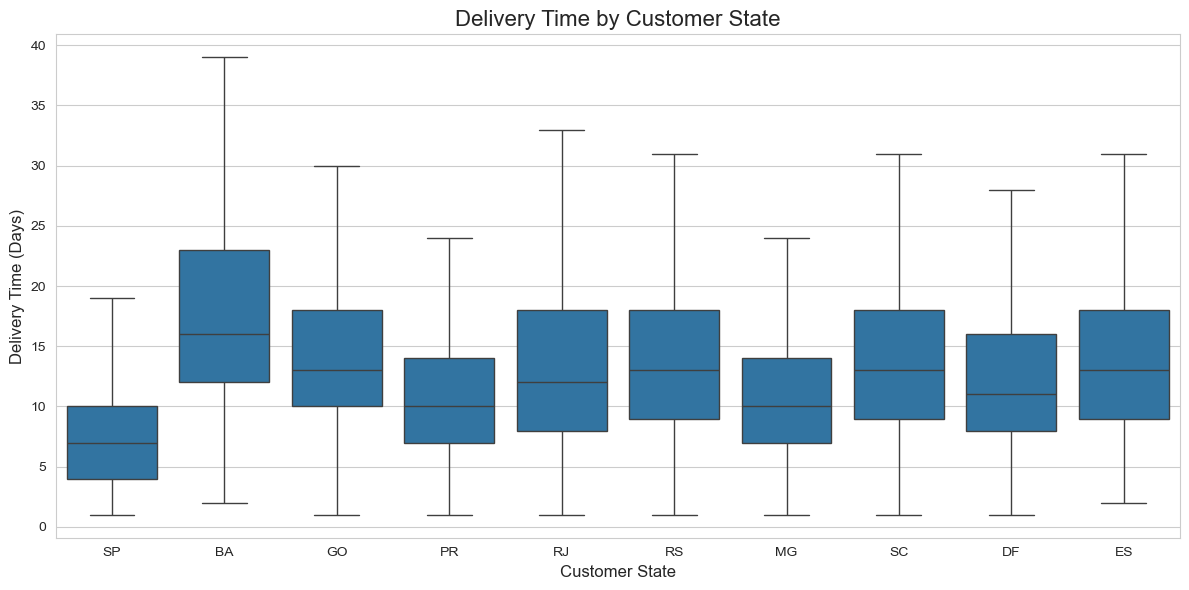

In [61]:
#- **Analyze delivery time by customer state:**  
customer_states = customers['customer_state'].value_counts().head(10).index.tolist()
orders_with_state = pd.merge(filtered_orders, customers, on='customer_id', how='left')
top_states_orders = orders_with_state[orders_with_state['customer_state'].isin(customer_states)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_states_orders, x='customer_state', y='delivery_time', showfliers=False)
plt.title('Delivery Time by Customer State', fontsize=16)
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Delivery Time (Days)', fontsize=12)
plt.tight_layout()
plt.show()


#### 7. Seller Performance Analysis

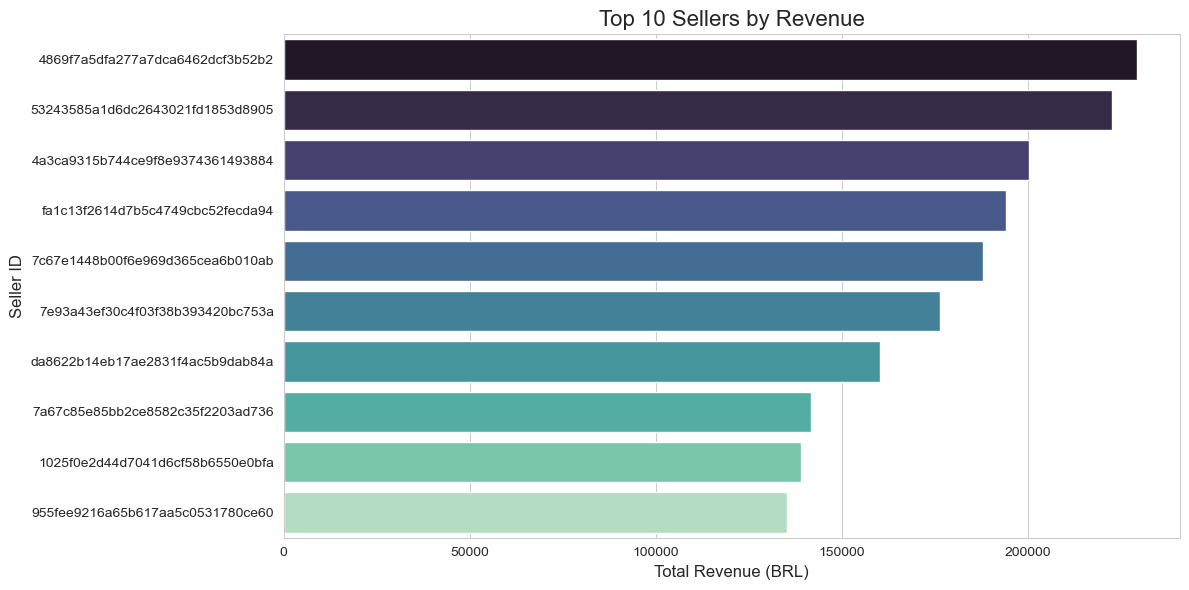

In [62]:
# Load sellers data
sellers = pd.read_csv('olist_sellers_dataset.csv')

# Merge with order items
seller_performance = pd.merge(order_items, sellers, on='seller_id', how='left')

# Top sellers by revenue
top_sellers = seller_performance.groupby('seller_id')['price'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_sellers, y='seller_id', x='price', hue='seller_id', dodge=False, palette='mako')
plt.title('Top 10 Sellers by Revenue', fontsize=16)
plt.xlabel('Total Revenue (BRL)', fontsize=12)
plt.ylabel('Seller ID', fontsize=12)
plt.tight_layout()
plt.show()

#### Findings: Top 10 Sellers by Revenue

- The bar plot highlights the top 10 sellers on the Olist platform based on total revenue generated.
- There is a significant disparity in revenue among the top sellers, with the leading seller earning over 229,000 BRL, while the 10th seller earns around 135,000 BRL.
- This concentration suggests that a small group of sellers contribute disproportionately to the platform's total sales.
- Identifying and supporting these high-performing sellers can be crucial for sustaining marketplace growth.
- The visualization also provides a benchmark for other sellers, helping to set performance targets and identify best practices.

#### 8. RFM (Recency, Frequency, Monetary) Analysis

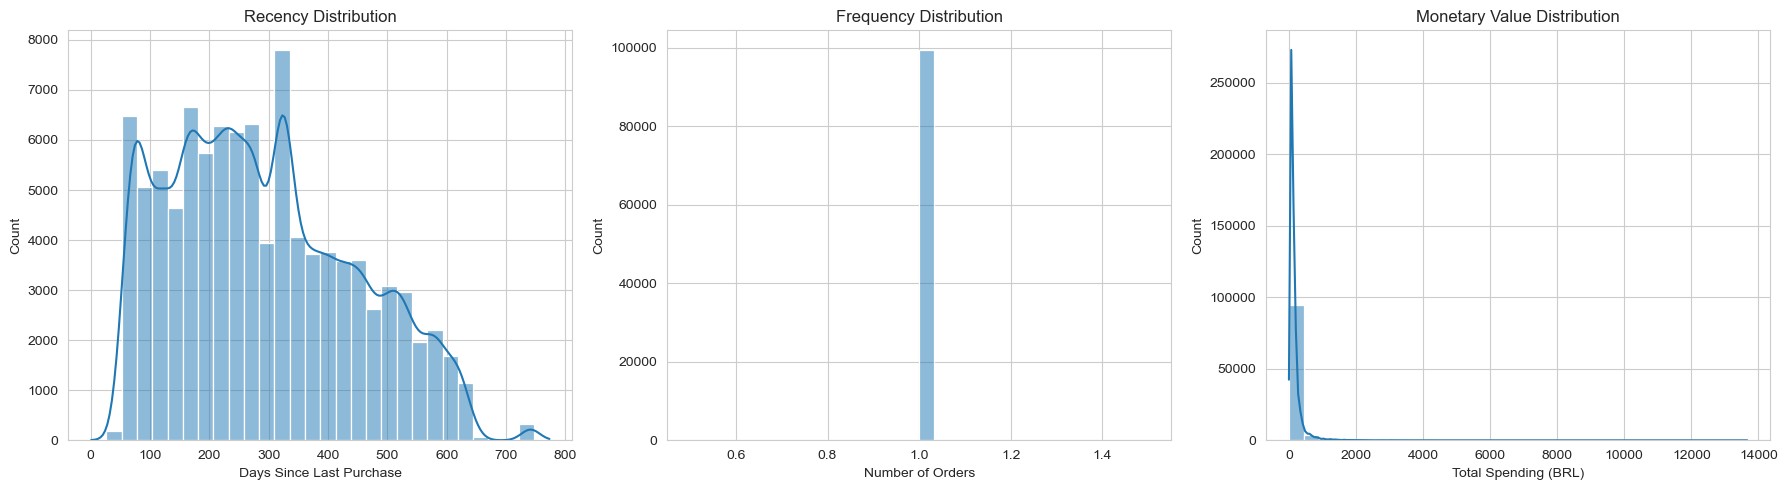

In [63]:
# Calculate RFM metrics
max_date = orders['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

rfm = orders.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'order_id': 'count',
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency']

# Merge with payment data to get monetary value
customer_payments = pd.merge(orders[['customer_id', 'order_id']], 
                           payments.groupby('order_id')['payment_value'].sum().reset_index(), 
                           on='order_id')

monetary = customer_payments.groupby('customer_id')['payment_value'].sum().reset_index()
rfm = pd.merge(rfm, monetary, on='customer_id')

# Plot RFM distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=rfm, x='recency', bins=30, ax=axes[0], kde=True)
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days Since Last Purchase')

sns.histplot(data=rfm, x='frequency', bins=30, ax=axes[1], kde=True)
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Orders')

sns.histplot(data=rfm, x='payment_value', bins=30, ax=axes[2], kde=True)
axes[2].set_title('Monetary Value Distribution')
axes[2].set_xlabel('Total Spending (BRL)')

plt.tight_layout()
plt.show()

#### Findings: RFM (Recency, Frequency, Monetary) Analysis

- **Recency:** The majority of customers made their last purchase a significant number of days ago, indicating a large base of inactive or one-time buyers. Only a small segment has purchased recently.
- **Frequency:** Most customers have placed only one or two orders, highlighting that repeat purchases are relatively rare on the platform.
- **Monetary:** The distribution of total spending is highly skewed, with most customers spending modest amounts and a small group of high-value customers contributing disproportionately to total revenue.
- **Business Implication:** These insights suggest opportunities for targeted marketing to re-engage inactive customers, encourage repeat purchases, and nurture high-value segments for increased loyalty and revenue.

#### 9. Correlation Heatmap

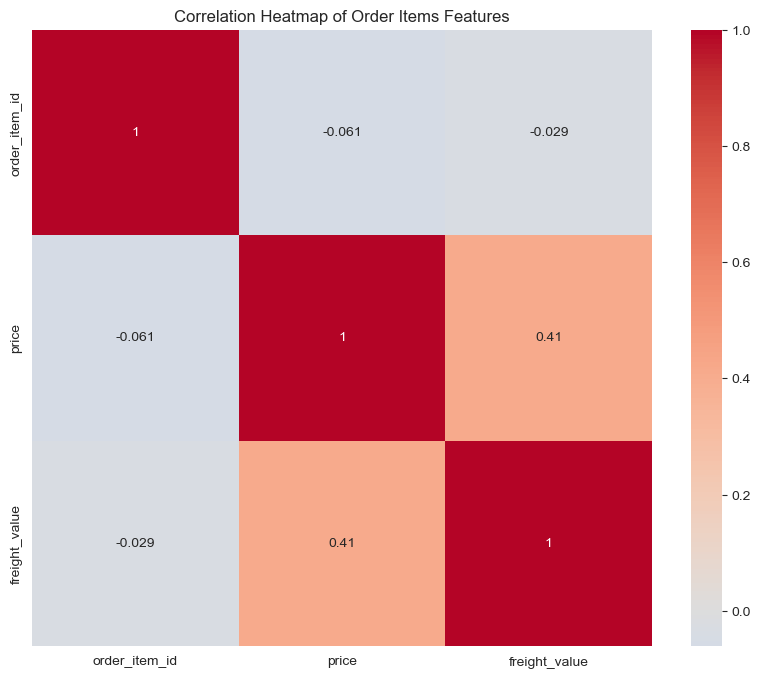

In [64]:
# Create correlation matrix (example with order items)
numeric_cols = order_items.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Order Items Features')
plt.show()

### 10. Interactive Visualizations (Plotly)
#### Monthly Sales with Product Categories (Interactive)


In [65]:
import plotly.express as px
# Load order items and products data
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')
orders = pd.read_csv('olist_orders_dataset.csv') 
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M').astype(str)

# Merge datasets and plot top categories
merged = order_items.merge(products, on='product_id').merge(product_category, on='product_category_name').merge(orders[['order_id', 'year_month']], on='order_id')

# Prepare data: monthly sales by category
monthly_category = merged.groupby(['year_month', 'product_category_name_english'])['order_id'].count().reset_index()
monthly_category = monthly_category[monthly_category['product_category_name_english'].isin(
    monthly_category['product_category_name_english'].value_counts().head(10).index)]

# Create interactive plot
fig = px.line(monthly_category, x='year_month', y='order_id', 
              color='product_category_name_english',
              title='Monthly Sales Trend by Top Product Categories',
              labels={'order_id': 'Number of Orders', 'year_month': 'Month-Year'})
fig.show()

#### Findings: Monthly Sales Trend by Top Product Categories (Interactive Plot)

- The interactive line plot reveals clear seasonality and growth patterns for the top 10 product categories on Olist.
- Categories such as "health_beauty", "watches_gifts", and "bed_bath_table" consistently lead in monthly sales volume, indicating strong and sustained customer demand.
- Most categories show a steady increase in sales from late 2016 through mid-2018, peaking around late 2017 and early 2018, which aligns with overall marketplace growth.
- Some categories experience noticeable spikes during certain months, suggesting the impact of promotions, holidays, or seasonal trends.
- After the peak, a decline is observed, likely due to incomplete data for the last months in the dataset.
- The visualization helps identify which product categories drive the most orders and how their popularity changes over time, providing valuable insights for inventory planning and marketing strategies.

#### Key Insights from Visualizations:
 - Order Trends:    Shows seasonality and growth patterns in the business

 - Geographic Distribution:  Reveals where most customers are concentrated

 - Payment Methods:  Highlights customer payment preferences

 - Product Categories:  Identifies top-performing categories

 - Customer Reviews:  Provides sentiment analysis and common feedback themes

 - Delivery Performance:  Shows efficiency of logistics operations

 - Seller Performance:  Identifies top-performing sellers

 - RFM Analysis:  Helps segment customers based on purchasing behavior

These visualizations tell a compelling story about the Olist marketplace's performance, customer behavior, and operational efficiency, providing actionable insights for business improvement.